In [ ]:
import matplotlib.pyplot as plt

from turtle import forward
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image

from torch.utils.data import Dataset, DataLoader

In [ ]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

True
NVIDIA GeForce RTX 3060
Using device: cuda


In [7]:

import time
import requests
import urllib.request
from pathlib import Path


available_breeds = ['affenpinscher', 'african', 'airedale', 'akita', 'appenzeller', 'australian', 'basenji', 'beagle', 'bluetick', 'borzoi', 'bouvier', 'boxer', 'brabancon', 'briard', 'buhund', 'bulldog', 'bullterrier', 'cattledog', 'chihuahua', 'chow', 'clumber', 'cockapoo', 'collie', 'coonhound', 'corgi', 'cotondetulear', 'dachshund', 'dalmatian', 'dane', 'deerhound', 'dhole', 'dingo', 'doberman', 'elkhound', 'entlebucher', 'eskimo', 'finnish', 'frise', 'germanshepherd', 'greyhound', 'groenendael', 'havanese', 'hound', 'husky', 'keeshond', 'kelpie', 'komondor', 'kuvasz', 'labradoodle', 'labrador', 'leonberg', 'lhasa', 'malamute', 'malinois', 'maltese', 'mastiff', 'mexicanhairless', 'mix', 'mountain', 'newfoundland', 'otterhound', 'ovcharka', 'papillon', 'pekinese', 'pembroke', 'pinscher', 'pitbull', 'pointer', 'pomeranian', 'poodle', 'pug', 'puggle', 'pyrenees', 'redbone', 'retriever', 'ridgeback', 'rottweiler', 'saluki', 'samoyed', 'schipperke', 'schnauzer', 'setter', 'sheepdog', 'shiba', 'shihtzu', 'spaniel', 'springer', 'stbernard', 'terrier', 'tervuren', 'vizsla', 'waterdog', 'weimaraner', 'whippet', 'wolfhound']

def get_dog_images(breed, count=100, type='train'):    
    for i in range(count):
        if breed not in available_breeds:
            raise ValueError('Breed not available')
        else:
            API = f'https://dog.ceo/api/breed/{breed}/images/random'
        
        img_url = requests.get(API).json()['message']
        # create folder if necessary
        breed_path = f"../data/dogy/{type}/{breed}"
        Path(breed_path).mkdir(parents=True, exist_ok=True)
        
        # download an image and save it in folder
        img = urllib.request.urlretrieve(img_url, f"{breed_path}/{breed}_{i}.jpg")
    return None

def get_breeds():
    API = 'https://dog.ceo/api/breeds/list/all'
    breeds = requests.get(API).json()['message']
    return breeds.keys()

from datetime import datetime

for dog in available_breeds:
    get_dog_images(dog)
    get_dog_images(dog, type='test', count=20)
    print(f"{datetime.now()} {dog} is done")


2025-09-15 14:41:25.910737 affenpinscher is done
2025-09-15 14:41:46.608347 african is done
2025-09-15 14:42:13.447412 airedale is done
2025-09-15 14:42:32.342226 akita is done
2025-09-15 14:42:57.759303 appenzeller is done
2025-09-15 14:43:12.959442 australian is done
2025-09-15 14:43:30.697158 basenji is done
2025-09-15 14:43:44.634362 beagle is done
2025-09-15 14:44:03.668529 bluetick is done
2025-09-15 14:44:26.329151 borzoi is done
2025-09-15 14:44:51.394536 bouvier is done
2025-09-15 14:45:20.600602 boxer is done
2025-09-15 14:46:09.656130 brabancon is done
2025-09-15 14:46:43.741048 briard is done
2025-09-15 14:47:03.826668 buhund is done
2025-09-15 14:47:30.388899 bulldog is done
2025-09-15 14:47:55.982732 bullterrier is done
2025-09-15 14:48:18.834217 cattledog is done
2025-09-15 14:48:43.192682 chihuahua is done
2025-09-15 14:49:07.692947 chow is done
2025-09-15 14:49:28.222162 clumber is done
2025-09-15 14:50:02.953361 cockapoo is done
2025-09-15 14:50:28.848999 collie is do

In [ ]:
1

In [ ]:
/a

In [32]:
img = Image.open("../data/image.png")
preproc = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.Resize((300, 300)),    
    transforms.CenterCrop(200),
    transforms.Grayscale(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.3]), # x.mean(), x.std() (tensor(0.5055), tensor(0.2883))
])
x = preproc(img)
x

tensor([[[ 0.0850, -0.0065,  0.0850,  ...,  0.5294,  0.5163,  0.4771],
         [-0.0327,  0.0327,  0.3725,  ...,  0.5556,  0.5425,  0.5163],
         [ 0.0065,  0.0850,  0.7647,  ...,  0.5686,  0.5556,  0.5294],
         ...,
         [ 0.5425,  0.5294,  0.5033,  ..., -1.1176, -1.1699, -1.2092],
         [ 0.5294,  0.5425,  0.5294,  ..., -1.1307, -1.1569, -1.2092],
         [ 0.5033,  0.5033,  0.5294,  ..., -1.1307, -1.1438, -1.1961]]])

In [ ]:
import os
import requests
import zipfile
from io import BytesIO

url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip"
target_dir = "../local/img_class1"
os.makedirs(target_dir, exist_ok=True)

response = requests.get(url)
response.raise_for_status()

with zipfile.ZipFile(BytesIO(response.content)) as z:
    z.extractall(target_dir)

print(f"Done! Files extracted to {os.path.abspath(target_dir)}")

Done! Files extracted to /home/not7/src/Vladimir-Ershov.github.io/projects/MLRecap/data/img_class1


In [10]:
import rarfile

rf = rarfile.RarFile("../local/img_class1/Concrete Crack Images for Classification.rar")
rf.extractall("../local/img_class1")
rf.close()

In [78]:
from random import shuffle
import torchvision
from torch.utils.data import DataLoader, random_split

 
preproc = transforms.Compose([
    transforms.Resize((32, 32)),    
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.3]), # x.mean(), x.std() (tensor(0.5055), tensor(0.2883))
])
batch_size =64
image_folder = torchvision.datasets.ImageFolder(root='../local/img_class1', transform=preproc)
classes = ['Positive', 'Negative']
train_size = int(0.8 * len(image_folder))
test_size = len(image_folder) - train_size

train_dataset, test_dataset = random_split(image_folder, [train_size, test_size])

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,num_workers=8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15686274..1.1437908].


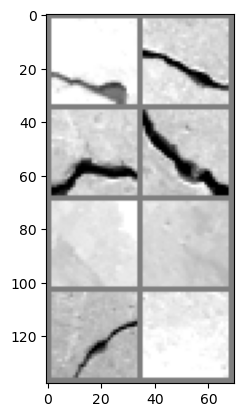

In [38]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images, nrow=2))    

In [94]:
class ImageClassNet(nn.Module):
    def __init__(self):
        super(ImageClassNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, 3),  # [bs, 6, 30, 30]
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [bs, 6, 15, 15]
            nn.Conv2d(6, 16, 3),  # [bs, 16, 13, 13]
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # [bs, 16, 6, 6]
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 6 * 6, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

E:0 / i:0 | 	 Loss=0.6933183073997498
E:0 / i:100 | 	 Loss=0.1404748260974884
E:0 / i:200 | 	 Loss=0.05399628356099129
E:0 / i:300 | 	 Loss=0.0913194864988327
E:0 / i:400 | 	 Loss=0.06625429540872574
E:1 / i:0 | 	 Loss=0.05126481130719185
E:1 / i:100 | 	 Loss=0.130271315574646
E:1 / i:200 | 	 Loss=0.07532098889350891
E:1 / i:300 | 	 Loss=0.0510425865650177
E:1 / i:400 | 	 Loss=0.020528901368379593
E:2 / i:0 | 	 Loss=0.021499156951904297
E:2 / i:100 | 	 Loss=0.03584334999322891
E:2 / i:200 | 	 Loss=0.08001957088708878
E:2 / i:300 | 	 Loss=0.033962432295084
E:2 / i:400 | 	 Loss=0.022819871082901955
E:3 / i:0 | 	 Loss=0.014841835014522076
E:3 / i:100 | 	 Loss=0.007014396600425243
E:3 / i:200 | 	 Loss=0.007466851733624935
E:3 / i:300 | 	 Loss=0.05554235726594925
E:3 / i:400 | 	 Loss=0.047611452639102936
E:4 / i:0 | 	 Loss=0.015646254643797874
E:4 / i:100 | 	 Loss=0.013367850333452225
E:4 / i:200 | 	 Loss=0.004905323497951031
E:4 / i:300 | 	 Loss=0.06379290670156479
E:4 / i:400 | 	 Loss=0.0

<Axes: >

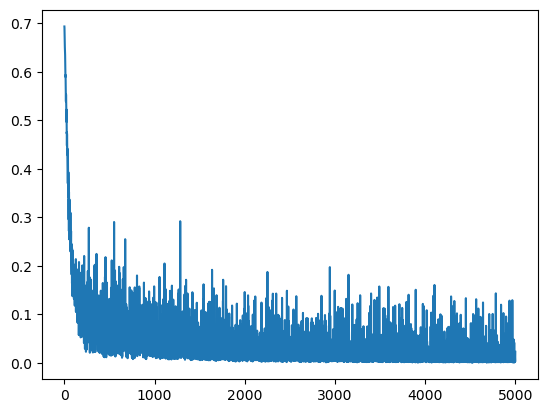

In [96]:
# device = 'cpu'
model = ImageClassNet().to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
EPOCHS = 10
losses = []

for epoch in range(EPOCHS):
    for i, batch in enumerate(trainloader):
        optimizer.zero_grad()

        pred = model(batch[0].to(device))

        loss = loss_fn(pred, batch[1].to(device).reshape(-1, 1).float())  
        loss.backward()
        losses.append(loss.item())

        optimizer.step()

        if i % 100 == 0:
            print(f"E:{epoch} / i:{i} | \t Loss={loss.item()}")


sns.lineplot(x=range(len(losses)), y=losses)


In [97]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device) 

y_test = []
y_test_hat = []
model.eval()  # Set model to evaluation mode
for i, data in enumerate(testloader, 0):
    inputs, y_test_temp = data
    inputs = inputs.to(device)  
    y_test_temp = y_test_temp.to(device) 
    with torch.no_grad():
        y_test_hat_temp = model(inputs).round()  
    
    y_test.append(y_test_temp)
    y_test_hat.append(y_test_hat_temp)

y_test = torch.cat(y_test).float()
y_test_hat = torch.cat(y_test_hat).float()

correct = (y_test_hat == y_test.reshape(-1, 1)).float().sum()
total = y_test.numel()
acc = correct / total

print(f'Accuracy: {acc*100:.2f} %')

Accuracy: 99.39 %
